## Fit a single-site model to three experimental replicate titrations, with a blank titration
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-15 12:26:49.030833
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: -256.88698247822754
# AICc: -256.01319607046054
# BIC: -229.88475521675423
# F: 108469.88240307561
# Rsq: 0.9997261345975302
# Rsq_adjusted: 0.9997169179734087
# df: 209
# ln(L): 136.44349123911377
# num_obs: 216
# num_param: 7
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,9.77654e+02,1.31471e+02,7.18468e+02,1.23684e+03,False,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.88971e-01,1.76257e-02,-4.23718e-01,-3.54223e-01,False,0.00000e+00,-inf,inf
global,global_dH,NA,-4.57753e+03,2.85356e+00,-4.58316e+03,-4.57191e+03,False,-4.00000e+03,-inf,inf
global,global_K,NA,4.20408e+07,5.91866e+05,4.08740e+07,4.32077e+07,False,1.00000e+06,-inf,inf
local,fx_competent,ca-edta/hepes-01.DH,1.13804e+00,2.25053e-04,1.13760e+00,1.13848e+00,False,1.00000e+00,-inf,inf
local,fx_competent,ca-edta/hepes-02.DH,1.14382e+00,2.22295e-04,1.14338e+00,1.

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


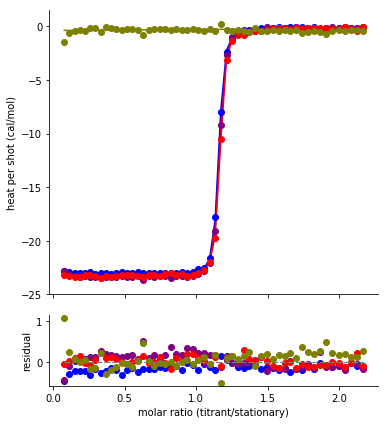

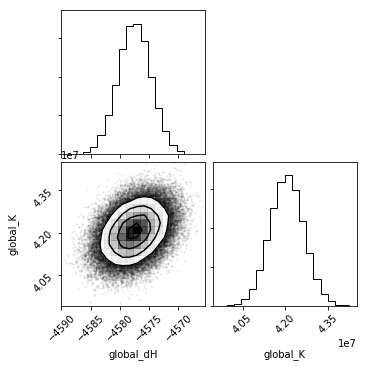

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")
g.link_to_global(a,"K","global_K")
g.link_to_global(a,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
b = pytc.ITCExperiment("ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")
g.link_to_global(b,"K","global_K")
g.link_to_global(b,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
c = pytc.ITCExperiment("ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(c)
g.link_to_global(c,"dilution_heat","global_heat")
g.link_to_global(c,"dilution_intercept","global_intercept")
g.link_to_global(c,"K","global_K")
g.link_to_global(c,"dH","global_dH")

# --------------------------------------------------------------------
# Load in a blank titration
d = pytc.ITCExperiment("ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(d)
g.link_to_global(d,"dilution_heat","global_heat")
g.link_to_global(d,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the four titrations
g.fit()

# --------------------------------------------------------------------

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
c = g.corner_plot()